<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Exploring the neighborhoods of Auckland and choosing a suitable residential area</font></h1>

For this week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)


For the second week, the final deliverables of the project will be:
1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):

Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data.
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.

3. Your choice of a presentation or blogpost. (10 marks)

## Introduction


Although Wellington is the capital city of New Zealand, Auckland is the largest urban area in New Zealand, with an urban population of around 1.65 million(2017) which accounted for 0.35% of the national population. Besides, Auckland is New Zealand's economic, cultural, shipping and tourism hub. The problem is that if you are not familiar with a city, it is difficult to decide which area to live in. And it is not an easy thing to make a decision as the final choice is always the balance of all factors. I would like to solve this problem by analyzing the data I could obtain. I will use Foursquare location data to explore Auckland to get a better understanding of the city and then choose a suitable community for me personally. According to the previous statement, the audience of this report would be people who want to decide the residence area in a more data-driven way and who have a curiosity about exploring their city.

## Data

Obviously, when choosing a place of residence, people have different standards. The same conditions create different levels of attraction for different people. From a macro perspective, Foursquare location data will be used to segment and cluster communities to gain a basic insight into these community characteristics. For my personal perspective, I will pay more attention to the atmosphere of the neighborhood. Specifically, I hope that there are coffee shops in the place where I will live, so I can relax with a cup of delicious coffee. In addition, if this area would close to Chinese restaurants, this area will be more attractive to me. Therefore, Foursquare location data will be used in order to get the number of coffee shop and Chinese restaurants in each neighborhood. Although I know that the Auckland CBD is perfectly meet these standards, I prefer to live in a place where it is not so crowded. So Auckland CBD is out of my consideration. Besides, the rent price would also be considered because of taking into account cost constraints. Lastly, I would put the personal median income of residents as a consideration factor due to preferring the good facilities and well-educated neighbor. For these two considerations, I will use the 2013 Census data from Stats NZ, which has record median rent paid and median personal income for different communities.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
import urllib
import re
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Data Gathering 

Here, we use previously cleaned data from 2013 Census.

In [2]:
df_income = pd.read_csv('2013_Median_personal_income.csv')

In [3]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
Area_unit_code            437 non-null int64
Area_unit_description     437 non-null object
Median_personal_income    437 non-null object
dtypes: int64(1), object(2)
memory usage: 10.3+ KB


In [4]:
df_income.head()

,Area_unit_code,Area_unit_description,Median_personal_income
0,505300,Wellsford,20700
1,505400,Leigh,25300
2,505500,Warkworth,26300
3,505601,Waimauku,39500
4,505602,Huapai,33900


In [6]:
area = list(df_income.loc[df_income['Area_unit_description'].isin(sub_list)]['Area_unit_description'])

NameError: name 'sub_list' is not defined

In [123]:
area

['Freemans Bay',
 'Newton',
 'New Windsor',
 'Blockhouse Bay',
 'Waterview',
 'Westmere',
 'Herne Bay',
 'Arch Hill',
 'Eden Terrace',
 'Mission Bay',
 'Glendowie',
 'Point England',
 'Stonefields',
 'Newmarket',
 'Kingsland',
 'Balmoral',
 'Three Kings',
 'Royal Oak',
 'Penrose',
 'Oranga',
 'Te Papapa',
 'Tamaki']

In [128]:
needed_area = [x for x in sub_list if x not in area]
needed_area

['Auckland CBD',
 'Avondale',
 'Eden Valley',
 'Ellerslie',
 'Epsom',
 'Glen Innes',
 'Grafton',
 'Greenlane',
 'Greenwoods Corner',
 'Grey Lynn',
 'Hillsborough',
 'Kohimarama',
 'Lynfield',
 'Meadowbank',
 'Morningside',
 'Mount Albert',
 'Mount Eden',
 'Mount Roskill',
 'Mount Wellington',
 'Onehunga',
 'One Tree Hill',
 'Orakei',
 'Otahuhu',
 'Owairaka',
 'Panmure',
 'Parnell',
 'Point Chevalier',
 'Ponsonby',
 'Remuera',
 'Saint Heliers',
 'Saint Johns',
 'Saint Marys Bay',
 'Sandringham',
 'Waikowhai',
 'Wai o Taiki Bay',
 'Western Springs',
 'Westfield']

In [200]:
del needed_df

In [224]:
needed_df=pd.DataFrame()

for item in needed_area:
    result = df_income.loc[df_income['Area_unit_description'].str.contains(item)]
    needed_df = needed_df.append(result,ignore_index=True)

        
        
        
needed_df.head()

,Area_unit_code,Area_unit_description,Median_personal_income
0,514600,Avondale South,24200
1,514802,Avondale West,19500
2,520201,Ellerslie North,41000
3,520202,Ellerslie South,42000
4,515700,Epsom North,27200


In [297]:
needed_df['Area_unit'] = ''

for item in needed_area:
    if needed_df['Area_unit_description'].str.contains(item).bool() == False:
        needed_df['Area_unit'] = {}.format(item)
    else:
        needed_df['Area_unit'] = 'NaN'
       

#needed_df = needed_df.apply(col)   
#needed_df

KeyError: 'Area_unit_description'

In [304]:
type(needed_df['Area_unit'])

str

In [264]:
needed_df['Area_unit'] = ''
def function(row):
    for item in needed_area:
        if item in row['Area_unit_description']:
            row['Area_unit'] = item
        else:
            return 0
needed_df = needed_df.apply(function) 

TypeError: 'int' object is not subscriptable

In [261]:
needed_df

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [47]:
#specify the url
url = "https://en.wikipedia.org/wiki/List_of_suburbs_of_Auckland"

#Query the website and return the html to the variable 'page'
page = requests.get(url)

In [48]:
html = page.text
soup = BeautifulSoup(html, 'html.parser')

In [49]:
soup.prettify() 

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of suburbs of Auckland - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );\n  </script>\n  <script>\n   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_suburbs_of_Auckland","wgTitle":"List of suburbs of Auckland","wgCurRevisionId":889958428,"wgRevisionId":889958428,"wgArticleId":6326964,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles lacking sources from April 2017","All articles lacking sources","Use dmy dates from August 2015","Use New Zealand English from August 2015","All Wikipedia articles written in New Zealand English","Suburbs of Auckland"],"wgBreakFrames":

In [50]:
first_div = soup.find("div","div-col columns column-width")
print(first_div)

<div class="div-col columns column-width" style="-moz-column-width: 18em; -webkit-column-width: 18em; column-width: 18em;">
<ul><li><a href="/wiki/Arch_Hill,_New_Zealand" title="Arch Hill, New Zealand">Arch Hill</a></li>
<li><a href="/wiki/Auckland_CBD" title="Auckland CBD">Auckland CBD</a></li>
<li><a href="/wiki/Avondale,_Auckland" title="Avondale, Auckland">Avondale</a></li>
<li><a href="/wiki/Balmoral,_New_Zealand" title="Balmoral, New Zealand">Balmoral</a></li>
<li><a class="mw-redirect" href="/wiki/Blockhouse_Bay,_New_Zealand" title="Blockhouse Bay, New Zealand">Blockhouse Bay</a></li>
<li><a href="/wiki/Eden_Terrace" title="Eden Terrace">Eden Terrace</a></li>
<li><a href="/wiki/Eden_Valley,_New_Zealand" title="Eden Valley, New Zealand">Eden Valley</a></li>
<li><a href="/wiki/Ellerslie,_New_Zealand" title="Ellerslie, New Zealand">Ellerslie</a></li>
<li><a href="/wiki/Epsom,_New_Zealand" title="Epsom, New Zealand">Epsom</a></li>
<li><a href="/wiki/Freemans_Bay" title="Freemans Bay

In [51]:
a=first_div.findAll("li")
sub_list= []
for i in a:
    lis = i("a")
#print(str(lis[0].text))
    sub_list.append(lis[0].text)
print(sub_list)

['Arch Hill', 'Auckland CBD', 'Avondale', 'Balmoral', 'Blockhouse Bay', 'Eden Terrace', 'Eden Valley', 'Ellerslie', 'Epsom', 'Freemans Bay', 'Glendowie', 'Glen Innes', 'Grafton', 'Greenlane', 'Greenwoods Corner', 'Grey Lynn', 'Herne Bay', 'Hillsborough', 'Kingsland', 'Kohimarama', 'Lynfield', 'Meadowbank', 'Mission Bay', 'Morningside', 'Mount Albert', 'Mount Eden', 'Mount Roskill', 'Mount Wellington', 'Newmarket', 'Newton', 'New Windsor', 'Onehunga', 'One Tree Hill', 'Orakei', 'Oranga', 'Otahuhu', 'Owairaka', 'Panmure', 'Parnell', 'Penrose', 'Point England', 'Point Chevalier', 'Ponsonby', 'Remuera', 'Royal Oak', 'Saint Heliers', 'Saint Johns', 'Saint Marys Bay', 'Sandringham', 'Stonefields', 'Tamaki', 'Te Papapa', 'Three Kings', 'Waikowhai', 'Wai o Taiki Bay', 'Waterview', 'Western Springs', 'Westfield', 'Westmere']


In [52]:
len(sub_list)

59

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

#### Load and explore the data

Next, let's load the data.

Let's take a quick look at the data.

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

Let's take a look at the first item in this list.

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

Take a look at the empty dataframe to confirm that the columns are as intended.

Then let's loop through the data and fill the dataframe one row at a time.

Quickly examine the resulting dataframe.

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

#### Create a map of New York with neighborhoods superimposed on top.

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [19]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

Take a look at the empty dataframe to confirm that the columns are as intended.

Then let's loop through the data and fill the dataframe one row at a time.

In [53]:
column_names = ['Suburb', 'Latitude', 'Longitude'] 
sub = pd.DataFrame(columns=column_names)
location = []
for s in  sub_list:
    address = '{}, Auckland, New Zealand'.format(s)
    #address = '{}, Auckland, New Zealand'
    geolocator = Nominatim(user_agent='ak_exploer')

    location = geolocator.geocode(address,addressdetails=True)
  
    latitude = location.latitude
    longitude = location.longitude
    sub = sub.append({'Suburb':s,'Latitude':location.latitude, 'Longitude':location.longitude}, ignore_index=True)
    print ('The geograpical coordinate of {0}, Auckland are {1},{2}.'.format(s, latitude, longitude))

The geograpical coordinate of Arch Hill, Auckland are -36.8660924,174.7459717.
The geograpical coordinate of Auckland CBD, Auckland are -36.848911,174.7652256.
The geograpical coordinate of Avondale, Auckland are -36.8930582,174.692814.
The geograpical coordinate of Balmoral, Auckland are -36.8892046,174.7486941.
The geograpical coordinate of Blockhouse Bay, Auckland are -36.9197769,174.70147.
The geograpical coordinate of Eden Terrace, Auckland are -36.8652491,174.756593.
The geograpical coordinate of Eden Valley, Auckland are -36.8767143,174.7512591.
The geograpical coordinate of Ellerslie, Auckland are -36.897603,174.8150298.
The geograpical coordinate of Epsom, Auckland are -36.8858447,174.7734616.
The geograpical coordinate of Freemans Bay, Auckland are -36.8531501,174.7509539.
The geograpical coordinate of Glendowie, Auckland are -36.8581662,174.8705371.
The geograpical coordinate of Glen Innes, Auckland are -36.8755256,174.8599466.
The geograpical coordinate of Grafton, Auckland

In [54]:
sub

,Suburb,Latitude,Longitude
0,Arch Hill,-36.866092,174.745972
1,Auckland CBD,-36.848911,174.765226
2,Avondale,-36.893058,174.692814
3,Balmoral,-36.889205,174.748694
4,Blockhouse Bay,-36.919777,174.701470
5,Eden Terrace,-36.865249,174.756593
6,Eden Valley,-36.876714,174.751259
7,Ellerslie,-36.897603,174.815030
8,Epsom,-36.885845,174.773462
9,Freemans Bay,-36.853150,174.750954


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [52]:
# create map of Manhattan using latitude and longitude values
map_auckland = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(sub['Latitude'], sub['Longitude'], sub['Suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_auckland)  
    
map_auckland

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [53]:
CLIENT_ID = '14IPFMUFTF5UH14I1V1OIOYMQVZ3Q04W0CR10LRG3EHPODEG' # your Foursquare ID
CLIENT_SECRET = 'T1KILPQ2LITERM30VOIOTSA0MM51QESPF1TDOSIS42XZYMCI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 14IPFMUFTF5UH14I1V1OIOYMQVZ3Q04W0CR10LRG3EHPODEG
CLIENT_SECRET:T1KILPQ2LITERM30VOIOTSA0MM51QESPF1TDOSIS42XZYMCI


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [59]:
sub.loc[0,'Suburb']

'Arch Hill'

Get the neighborhood's latitude and longitude values.

In [61]:
suburb_latitude = sub.loc[0, 'Latitude'] # neighborhood latitude value
suburb_longitude = sub.loc[0, 'Longitude'] # neighborhood longitude value

suburb_name = sub.loc[0, 'Suburb'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(suburb_name, 
                                                               suburb_latitude, 
                                                               suburb_longitude))

Latitude and longitude values of Arch Hill are -36.8660924, 174.7459717.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [62]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    suburb_latitude, 
    suburb_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=14IPFMUFTF5UH14I1V1OIOYMQVZ3Q04W0CR10LRG3EHPODEG&client_secret=T1KILPQ2LITERM30VOIOTSA0MM51QESPF1TDOSIS42XZYMCI&v=20180605&ll=-36.8660924,174.7459717&radius=500&limit=100'

Double-click __here__ for the solution.
<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
-->

<!--
radius = 500 # define radius
-->

<!--
\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
--> 

Send the GET request and examine the resutls

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cc46c28c53093002c0de37b'},
 'response': {'headerLocation': 'Arch Hill',
  'headerFullLocation': 'Arch Hill, Auckland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': -36.8615923955, 'lng': 174.75158592346068},
   'sw': {'lat': -36.8705924045, 'lng': 174.74035747653934}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c25381ff7ced13ae637246d',
       'name': 'Philippes Chocolat',
       'location': {'address': '302-308 Great North Rd',
        'lat': -36.86530493364565,
        'lng': 174.74482195586552,
        'labeledLatLngs': [{'label': 'display',
          'lat': -36.86530493364565,
          'lng': 174.74482195586552}],
        'distance': 134,
        'postalCode': '102

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [65]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Philippes Chocolat,Bakery,-36.865305,174.744822
1,Charlie Boys,Café,-36.862712,174.748618
2,Hireace,Rental Car Location,-36.866129,174.744214
3,Funk Estate Brewery,Brewery,-36.867468,174.741958


And how many venues were returned by Foursquare?

In [66]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [69]:
# type your answer here

auckland_venues = getNearbyVenues(names=sub['Suburb'],
                                   latitudes=sub['Latitude'],
                                   longitudes=sub['Longitude']
                                  )

Arch Hill
Auckland CBD
Avondale
Balmoral
Blockhouse Bay
Eden Terrace
Eden Valley
Ellerslie
Epsom
Freemans Bay
Glendowie
Glen Innes
Grafton
Greenlane
Greenwoods Corner
Grey Lynn
Herne Bay
Hillsborough
Kingsland
Kohimarama
Lynfield
Meadowbank
Mission Bay
Morningside
Mount Albert
Mount Eden
Mount Roskill
Mount Wellington
Newmarket
Newton
New Windsor
Onehunga
One Tree Hill
Orakei
Oranga
Otahuhu
Owairaka
Panmure
Parnell
Penrose
Point England
Point Chevalier
Ponsonby
Remuera
Royal Oak
Saint Heliers
Saint Johns
Saint Marys Bay
Sandringham
Stonefields
Tamaki
Te Papapa
Three Kings
Waikowhai
Wai o Taiki Bay
Waterview
Western Springs
Westfield
Westmere


Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [105]:
print(auckland_venues.shape)
auckland_venues.head()

(682, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arch Hill,-36.866092,174.745972,Philippes Chocolat,-36.865305,174.744822,Bakery
1,Arch Hill,-36.866092,174.745972,Charlie Boys,-36.862712,174.748618,Café
2,Arch Hill,-36.866092,174.745972,Hireace,-36.866129,174.744214,Rental Car Location
3,Arch Hill,-36.866092,174.745972,Funk Estate Brewery,-36.867468,174.741958,Brewery
4,Auckland CBD,-36.848911,174.765226,Mrs Higgins Oven Fresh Cookies,-36.850006,174.764820,Bakery


In [119]:
auckland_venues['Venue Category'].value_counts().head()

Café                 111
Bar                   25
Park                  23
Coffee Shop           23
Indian Restaurant     23
Name: Venue Category, dtype: int64

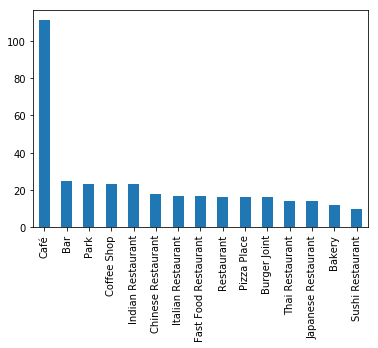

In [125]:
auckland_venues['Venue Category'].value_counts().head(15).plot(kind='bar')

Let's check how many venues were returned for each neighborhood

In [102]:
auckland_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Arch Hill,4,4,4,4,4,4
Auckland CBD,100,100,100,100,100,100
Avondale,5,5,5,5,5,5
Balmoral,20,20,20,20,20,20
Blockhouse Bay,7,7,7,7,7,7
Eden Terrace,23,23,23,23,23,23
Eden Valley,15,15,15,15,15,15
Ellerslie,11,11,11,11,11,11
Epsom,7,7,7,7,7,7


#### Let's find out how many unique categories can be curated from all the returned venues

In [72]:
print('There are {} uniques categories.'.format(len(auckland_venues['Venue Category'].unique())))

There are 138 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [73]:
# one hot encoding
auckland_onehot = pd.get_dummies(auckland_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
auckland_onehot['Suburb'] = auckland_venues['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [auckland_onehot.columns[-1]] + list(auckland_onehot.columns[:-1])
auckland_onehot = auckland_onehot[fixed_columns]

auckland_onehot.head()

,Suburb,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Beer Garden,Bistro,Bookstore,Bowling Green,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Café,Chinese Restaurant,Circus,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Home Service,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,Noodle House,Organic Grocery,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Recording Studio,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Shopping Mall,Skating Rink,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Arch Hill,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arch Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arch Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arch Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Auckland CBD,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [74]:
auckland_onehot.shape

(682, 139)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [75]:
auckland_grouped = auckland_onehot.groupby('Suburb').mean().reset_index()
auckland_grouped

,Suburb,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Beer Garden,Bistro,Bookstore,Bowling Green,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Café,Chinese Restaurant,Circus,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Home Service,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,Noodle House,Organic Grocery,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Recording Studio,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Shopping Mall,Skating Rink,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Arch Hill,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.250000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,Auckland CBD,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.0,0.00,0.000000,0.01,0.000000,0.010000,0.01,0.0,0.01,0.000000,0.01,0.000000,0.040000,0.000000,0.100000,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.030000,0.000000,0.010000,0.00000,0.010000,0.030000,0.030000,0.000000,0.0,0.00000,0.01000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.010000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.0,0.000000,0.030000,0.010000,0.040000,0.01,0.020000,0.040000,0.010000,0.000000,0.000000,0.02000,0.01,0.0,0.000000,0.03,0.00000,0.000000,0.000000,0.010000,0.000000,0.01,0.01,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.010000,0.00,0.000000,0.030000,0.000000,0.010000,0.010000,0.010000,0.0,0.000000,0.0,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.01,0.0,0.010000,0.010000,0.000000,0.030000,0.0

#### Let's confirm the new size

In [76]:
auckland_grouped.shape

(59, 139)

#### Let's print each neighborhood along with the top 5 most common venues

In [77]:
num_top_venues = 5

for hood in auckland_grouped['Suburb']:
    print("----"+hood+"----")
    temp = auckland_grouped[auckland_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arch Hill----
                 venue  freq
0              Brewery  0.25
1  Rental Car Location  0.25
2                 Café  0.25
3               Bakery  0.25
4      Organic Grocery  0.00


----Auckland CBD----
                 venue  freq
0                 Café  0.10
1           Restaurant  0.05
2  Japanese Restaurant  0.04
3         Burger Joint  0.04
4    Indian Restaurant  0.04


----Avondale----
                venue  freq
0                Café   0.4
1           Racetrack   0.2
2              Market   0.2
3  Chinese Restaurant   0.2
4        Noodle House   0.0


----Balmoral----
                  venue  freq
0    Chinese Restaurant  0.20
1  Fast Food Restaurant  0.10
2      Asian Restaurant  0.10
3       Thai Restaurant  0.10
4   Japanese Restaurant  0.05


----Blockhouse Bay----
                      venue  freq
0            Ice Cream Shop  0.14
1             Grocery Store  0.14
2                      Café  0.14
3  Mediterranean Restaurant  0.14
4               Video Store  0

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [79]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = auckland_grouped['Suburb']

for ind in np.arange(auckland_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(auckland_grouped.iloc[ind, :], num_top_venues)

suburb_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arch Hill,Café,Rental Car Location,Bakery,Brewery,Yoga Studio,Filipino Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop
1,Auckland CBD,Café,Restaurant,Indian Restaurant,Japanese Restaurant,Burger Joint,Sushi Restaurant,Dessert Shop,Department Store,Lounge,Coffee Shop
2,Avondale,Café,Market,Racetrack,Chinese Restaurant,Yoga Studio,Filipino Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
3,Balmoral,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Fast Food Restaurant,Liquor Store,Gym,Park,Dumpling Restaurant,Convenience Store,Japanese Restaurant
4,Blockhouse Bay,Neighborhood,Video Store,Fish & Chips Shop,Café,Grocery Store,Mediterranean Restaurant,Ice Cream Shop,Dumpling Restaurant,Donut Shop,Electronics Store


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [81]:
# set number of clusters
kclusters = 5

auckland_grouped_clustering = auckland_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(auckland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [86]:
# add clustering labels
suburb_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

auckland_merged = sub

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
auckland_merged = auckland_merged.join(suburb_venues_sorted.set_index('Suburb'), on='Suburb')

auckland_merged.head() # check the last columns!

,Suburb,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arch Hill,-36.866092,174.745972,2,Café,Rental Car Location,Bakery,Brewery,Yoga Studio,Filipino Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop
1,Auckland CBD,-36.848911,174.765226,2,Café,Restaurant,Indian Restaurant,Japanese Restaurant,Burger Joint,Sushi Restaurant,Dessert Shop,Department Store,Lounge,Coffee Shop
2,Avondale,-36.893058,174.692814,2,Café,Market,Racetrack,Chinese Restaurant,Yoga Studio,Filipino Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
3,Balmoral,-36.889205,174.748694,1,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Fast Food Restaurant,Liquor Store,Gym,Park,Dumpling Restaurant,Convenience Store,Japanese Restaurant
4,Blockhouse Bay,-36.919777,174.701470,2,Neighborhood,Video Store,Fish & Chips Shop,Café,Grocery Store,Mediterranean Restaurant,Ice Cream Shop,Dumpling Restaurant,Donut Shop,Electronics Store


Finally, let's visualize the resulting clusters

In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(auckland_merged['Latitude'], auckland_merged['Longitude'], auckland_merged['Suburb'], auckland_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [96]:
auckland_merged.loc[auckland_merged['Cluster Labels'] == 0, auckland_merged.columns[[0] + list(range(4, auckland_merged.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Westfield,Racetrack,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store


#### Cluster 2

In [97]:
auckland_merged.loc[auckland_merged['Cluster Labels'] == 1, auckland_merged.columns[[0] + list(range(4, auckland_merged.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Balmoral,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Fast Food Restaurant,Liquor Store,Gym,Park,Dumpling Restaurant,Convenience Store,Japanese Restaurant
11,Glen Innes,Supermarket,Pizza Place,Snack Place,Turkish Restaurant,Bakery,Farmers Market,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant
17,Hillsborough,Bakery,Athletics & Sports,Park,Yoga Studio,Fast Food Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant
19,Kohimarama,Pizza Place,Italian Restaurant,Fast Food Restaurant,Bakery,Stadium,Park,Donut Shop,Dumpling Restaurant,Diner,Food Truck
20,Lynfield,Pizza Place,Sandwich Place,Burger Joint,Fast Food Restaurant,Shopping Mall,Bar,Grocery Store,Donut Shop,Dumpling Restaurant,Electronics Store
26,Mount Roskill,Asian Restaurant,Tea Room,Food & Drink Shop,Kids Store,Park,Grocery Store,Video Store,Stadium,Bakery,Market
27,Mount Wellington,Scenic Lookout,Climbing Gym,Skating Rink,Farmers Market,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Yoga Studio
30,New Windsor,Indian Restaurant,Home Service,Bus Station,Chinese Restaurant,Filipino Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
35,Otahuhu,Vietnamese Restaurant,Fast Food Restaurant,Thai Restaurant,Yoga Studio,Farmers Market,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant
37,Panmure,Gym / Fitness Center,Grocery Store,Malay Restaurant,Chinese Restaurant,Yoga Studio,Fast Food Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant


#### Cluster 3

In [98]:
auckland_merged.loc[auckland_merged['Cluster Labels'] == 2, auckland_merged.columns[[0] + list(range(4, auckland_merged.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arch Hill,Café,Rental Car Location,Bakery,Brewery,Yoga Studio,Filipino Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop
1,Auckland CBD,Café,Restaurant,Indian Restaurant,Japanese Restaurant,Burger Joint,Sushi Restaurant,Dessert Shop,Department Store,Lounge,Coffee Shop
2,Avondale,Café,Market,Racetrack,Chinese Restaurant,Yoga Studio,Filipino Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
4,Blockhouse Bay,Neighborhood,Video Store,Fish & Chips Shop,Café,Grocery Store,Mediterranean Restaurant,Ice Cream Shop,Dumpling Restaurant,Donut Shop,Electronics Store
5,Eden Terrace,Café,Indian Restaurant,American Restaurant,Sushi Restaurant,Japanese Restaurant,Kebab Restaurant,French Restaurant,Music Venue,Park,Pizza Place
6,Eden Valley,Café,Bar,Chinese Restaurant,Restaurant,Burger Joint,Portuguese Restaurant,Gym Pool,Electronics Store,Falafel Restaurant,Farmers Market
7,Ellerslie,Pizza Place,Café,Hotel,Turkish Restaurant,Chinese Restaurant,Bakery,Bar,Coffee Shop,Park,Electronics Store
8,Epsom,Chinese Restaurant,Asian Restaurant,Tailor Shop,Japanese Restaurant,Café,Circus,Yoga Studio,Fish & Chips Shop,Food Court,Food & Drink Shop
9,Freemans Bay,Café,Bar,Italian Restaurant,Cosmetics Shop,Restaurant,Thai Restaurant,Japanese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Park
12,Grafton,Café,Coffee Shop,Hostel,Train Station,Sandwich Place,Food,Pharmacy,Gym,Gourmet Shop,Dessert Shop


#### Cluster 4

In [99]:
auckland_merged.loc[auckland_merged['Cluster Labels'] == 3, auckland_merged.columns[[0] + list(range(4, auckland_merged.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Orakei,Athletics & Sports,Bus Station,Tennis Court,Yoga Studio,Fast Food Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant
46,Saint Johns,Tennis Court,Yoga Studio,French Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


#### Cluster 5

In [100]:
auckland_merged.loc[auckland_merged['Cluster Labels'] == 4, auckland_merged.columns[[0] + list(range(4, auckland_merged.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Glendowie,Park,Thai Restaurant,Yoga Studio,Fast Food Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Farmers Market
21,Meadowbank,Park,Café,Yoga Studio,Farmers Market,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
24,Mount Albert,Park,History Museum,Yoga Studio,Farmers Market,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Electronics Store
36,Owairaka,Pub,Park,Falafel Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store
43,Remuera,Bowling Green,Park,Farmers Market,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lin](https://www.linkedin.com/in/polonglin/). I hope you found this lab interesting and educational. Feel free to contact us if you have any questions!

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).